In [ ]:
!pip install fbprophet
from fbprophet import Prophet

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [2]:
dado = pd.read_csv('./data_comexstat.csv',encoding='latin-1')
dado.index = pd.to_datetime(dado.date)
dado = dado.drop('date',axis=1)
dado.product = dado.iloc[:,0]
dado_groups = dado.groupby([dado.index.year,dado.index.month,dado.type]).sum()
dado_groups= dado_groups[dado_groups.index.get_level_values(2)=="Export"]

In [3]:
usd = dado_groups.groupby(dado_groups.index.get_level_values(0)).sum().usd/1000000000

In [4]:
anos=usd.index
ds=[]
for i in range(anos[0],anos[-1]+12):
    ds.append(dt.datetime(i,1,1))

In [5]:
y = pd.DataFrame({'ds':ds[:-19],'y':usd.values[:-8]}, index=pd.to_datetime(ds[:-19]).year)
y_test = pd.DataFrame({'ds':ds[:-11],'y':usd.values}, index=pd.to_datetime(ds[:-11]).year)

In [6]:
y

,ds,y
1997,1997-01-01,6.443798
1998,1998-01-01,5.347977
1999,1999-01-01,4.308318
2000,2000-01-01,4.431648
2001,2001-01-01,6.282705
2002,2002-01-01,6.891111
2003,2003-01-01,8.787319
2004,2004-01-01,11.007131
2005,2005-01-01,11.016699
2006,2006-01-01,11.993609


In [12]:
y_test

,ds,y
1997,1997-01-01,6.443798
1998,1998-01-01,5.347977
1999,1999-01-01,4.308318
2000,2000-01-01,4.431648
2001,2001-01-01,6.282705
2002,2002-01-01,6.891111
2003,2003-01-01,8.787319
2004,2004-01-01,11.007131
2005,2005-01-01,11.016699
2006,2006-01-01,11.993609


# Conjunto de treinamento

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


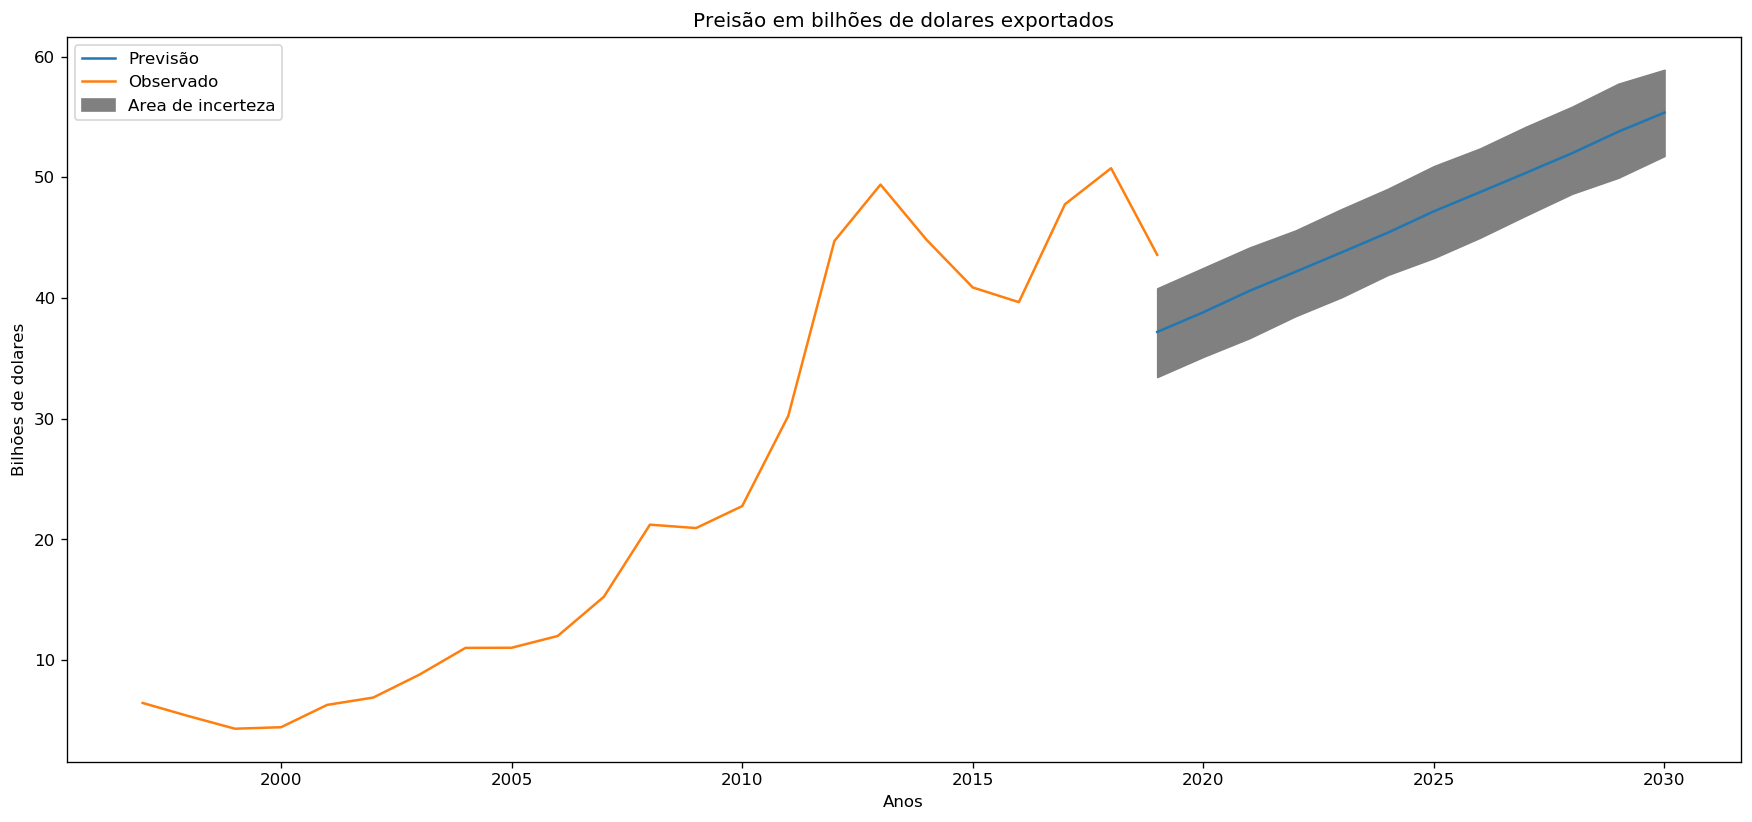

In [13]:
m = Prophet()
m.fit(y)
future=pd.DataFrame({'ds':ds[22:]})
forecast = m.predict(future)
forecast.index = list(range(2019,2031))

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


simple_bias=forecast.yhat_upper.iloc[-1]-forecast.yhat_upper.iloc[-1]


fig=plt.figure(dpi=120)
plt.plot(forecast.yhat,label='Previsão')
plt.plot(y_test.y,label='Observado')
plt.fill_between(forecast.index,forecast.yhat_lower+simple_bias, forecast.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.title('Preisão em bilhões de dolares exportados')
plt.ylabel('Bilhões de dolares')
plt.xlabel('Anos')

plt.legend()
plt.show()

# Conjunto de teste

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


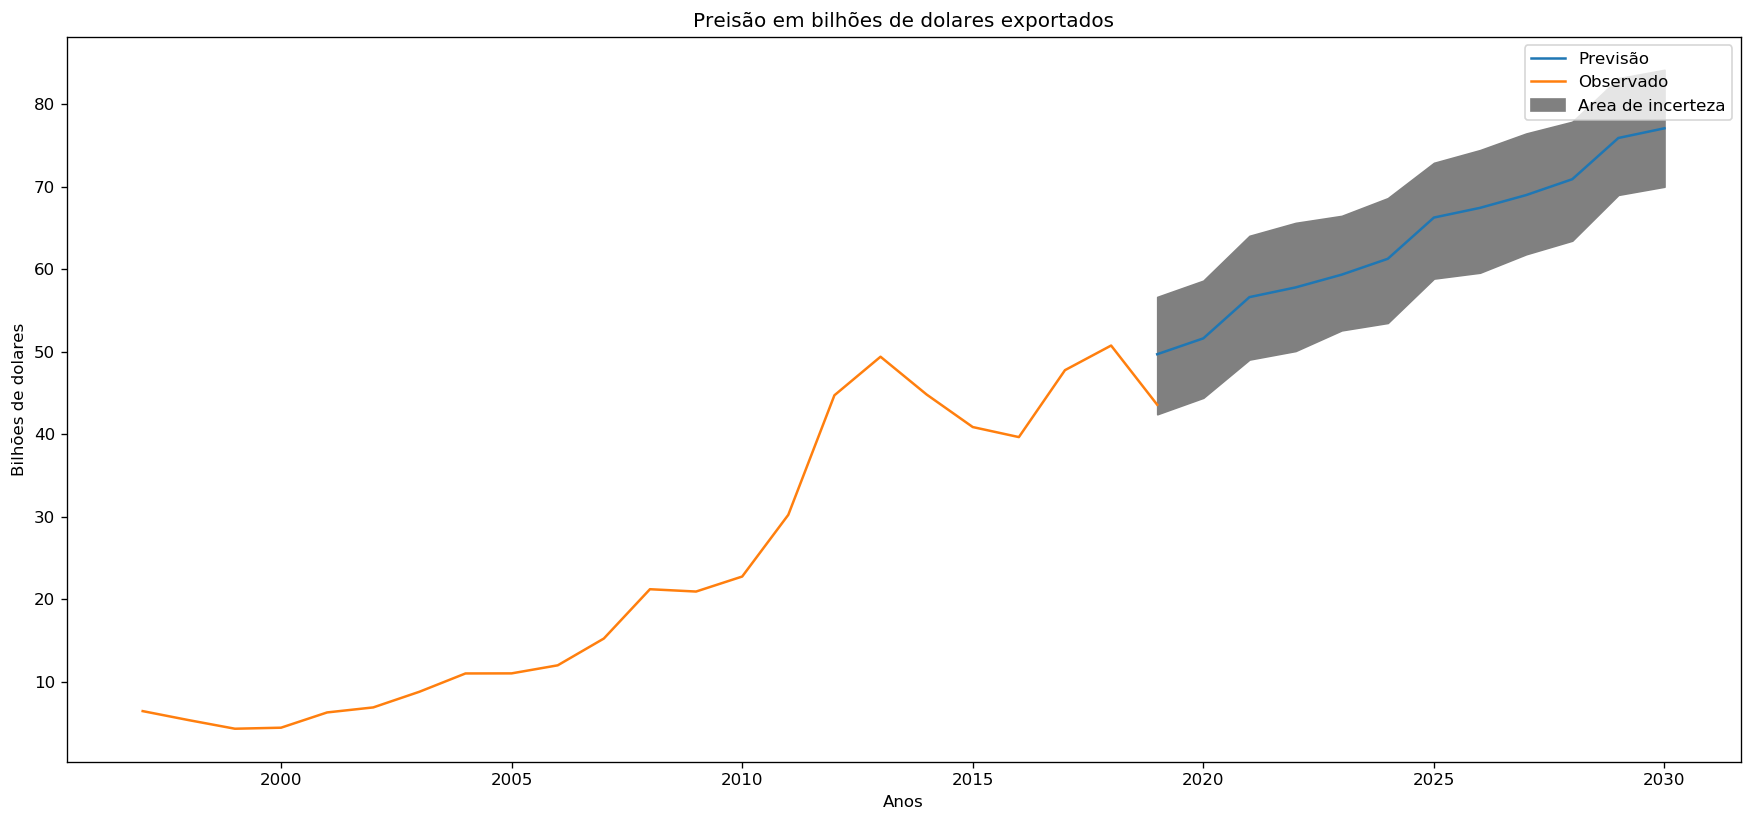

In [14]:
m = Prophet()
m.fit(y_test)
future=pd.DataFrame({'ds':ds[22:]})
forecast = m.predict(future)
forecast.index = list(range(2019,2031))

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


simple_bias=forecast.yhat_upper.iloc[-1]-forecast.yhat_upper.iloc[-1]


fig=plt.figure(dpi=120)
plt.plot(forecast.yhat,label='Previsão')
plt.plot(y_test.y,label='Observado')
plt.fill_between(forecast.index,forecast.yhat_lower+simple_bias, forecast.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.title('Preisão em bilhões de dolares exportados')
plt.ylabel('Bilhões de dolares')
plt.xlabel('Anos')

plt.legend()
plt.show()